# Direct discharges measurements at P1

**Here we calcul discharges from salt dilution experiment at P1**

Discharge were evaluated at 3 cross section along the cannal: P1, P2, P3 (1,2 and 3 in map bellow). And at different time along the drainage duration

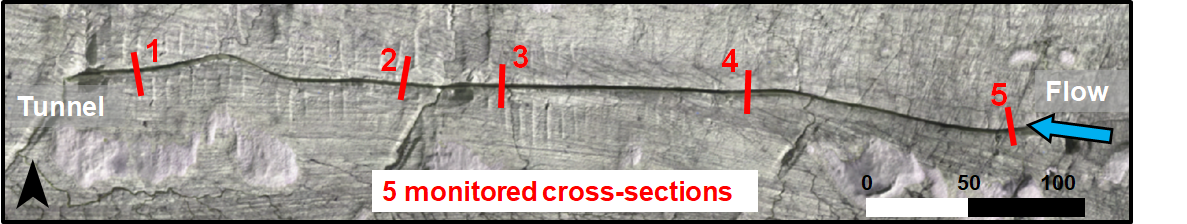

### Salt Injections realized on field

Highlighted in red : probably to noisy data


<div>
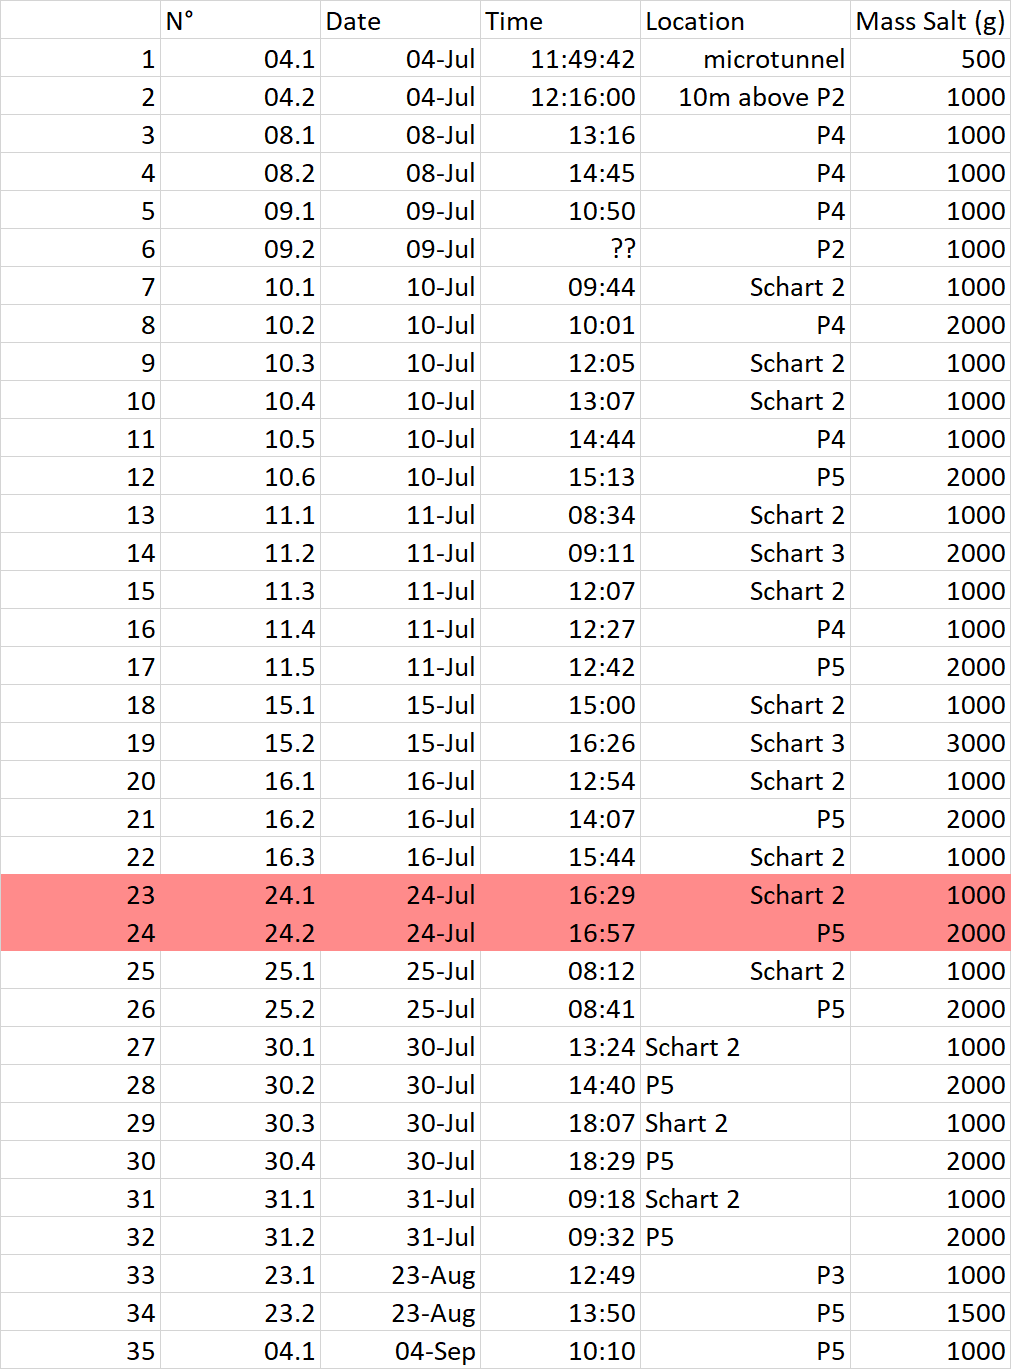
</div>



## Discharges at P1

Here we:
- Import CTD data file using `read_Keller_DCX22_CTD`  
- Extract (manually) the breakthrough curve corresponding to the salt dilution experiment
- Store it in `trace` , as well as other informations related to the salt injection (time, sensor number, location of injection, mass of salt....etc)
- Integrate the breakthrough curve with `calcQ` and [`Conductivity_calibration_CTD.ipynb`](Conductivity_calibration_CTD.ipynb)
- Calculate discharge with `integrate_concentration`
- store the disharge value and time corresponding in `path_data/products` (path_data is defined further below)

Functions are found on [`helper_functions.ipynb`](helper_functions.ipynb)

Estimated linear fit: f(delta_cond) = a*conc with (margin errors 5%)
 a = 0.000801±0.00017

Estimated linear fit: f(delta_cond) = a*conc with (margin errors 5%)
 a = 0.000675±0.000112

Estimated linear fit: f(delta_cond) = a*conc with (margin errors 5%)
 a = 0.000597±0.000205

Estimated linear fit: f(delta_cond) = a*conc with (margin errors 5%)
 a = 0.000585±0.000182

Estimated fit: f(delta_cond) = a*conc^2 + b*conc with (± std dev)
 a = 4.29e-7±9.68e-8
    and b = 0.000797±1.3e-5

Estimated fit: f(delta_cond) = a*conc^2 + b*conc with (± std dev)
 a = -5.07e-7±1.91e-7
    and b = 0.000975±2.5e-5

Estimated fit: f(delta_cond) = a*conc^2 + b*conc with (± std dev)
 a = 1.91e-6±1.86e-7
    and b = 0.000542±2.48e-5

Estimated fit: f(delta_cond) = a*conc^2 + b*conc with (± std dev)
 a = 2.26e-6±1.94e-7
    and b = 0.000485±2.57e-5



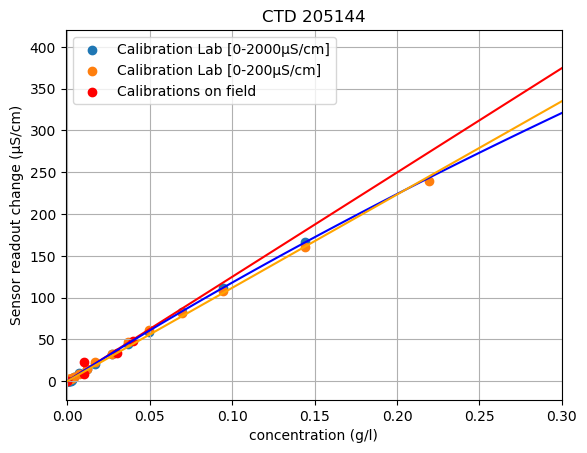

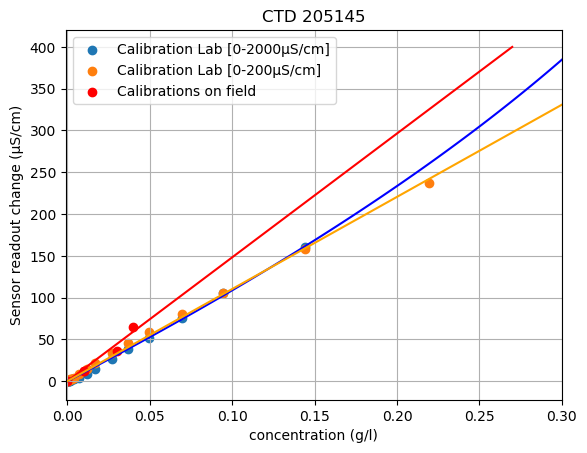

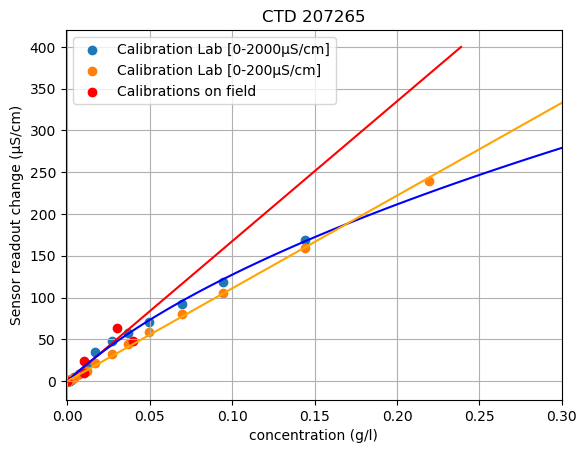

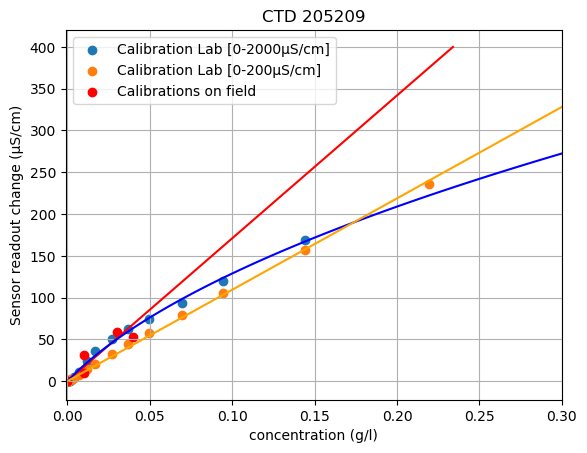

Estimated fit: f(delta_cond) = a*conc with (± std dev)
 a = 0.000896±8.1e-6 

Estimated fit: f(delta_cond) = a*conc with (± std dev)
 a = 0.000907±7.26e-6 

Estimated fit: f(delta_cond) = a*conc with (± std dev)
 a = 0.000901±5.87e-6 

Estimated fit: f(delta_cond) = a*conc with (± std dev)
 a = 0.000914±5.77e-6 



In [1]:
using Statistics
using NBInclude
@nbinclude("helper-functions.ipynb");
@nbinclude("Conductivity_calibration_CTD.ipynb");

### To extract injections from a CSV file

In [2]:
injections = read_salt_injections(joinpath(path_data,"Salt_injections/Salt_injections.csv"));

### Now let's get the `traces` for each salt injection at P1

The `traces` contains all the time series we are interested on and others caracteristics : sensor (`sensor`), number of salt injection (`id`), conductivity (`cond`),mass (`mass`),sensor location (`loc`), pressure (`press`), temperature (`temp`) 

They are manually selected to extract the breakthrough cuve of salt injection



In [3]:
traces=[];

**Salt injection n° 2** 


In [4]:
#pygui(true)
#plotit(path_CTD*"2019-07-04/207265-300mH2O_04_07_2019-09_00_00.csv", :CTD, :cond, plottime=false)
d = read_Keller_DCX22_CTD(path_CTD*"2019-07-04/207265-300mH2O_04_07_2019-09_00_00.csv");
indices=[12000:12500];
newtraces = split_conductivity_data_indices(d,indices);
for (n,id,mass) in zip(newtraces, [2], [1] )
    n[:sensor] = 207265
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);

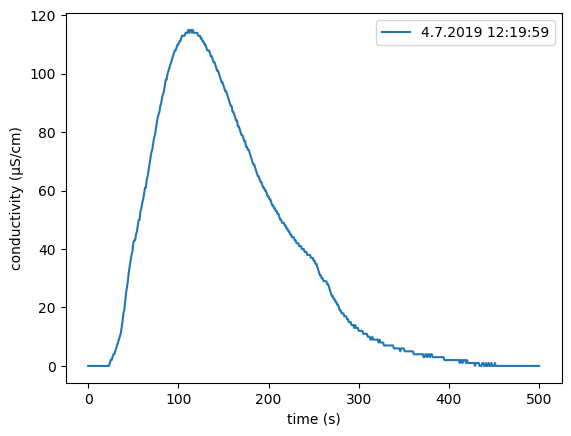

PyObject <matplotlib.legend.Legend object at 0x0000000053D168D0>

In [5]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

**5 , 6**

In [6]:
#pygui(true)
#plotit(path_CTD*"2019-07-09/205144-10mH2O_09_07_2019-08_00_00.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-09/205144-10mH2O_09_07_2019-08_00_00.csv");
indices=[12000:15000, 20700:21300];
newtraces = split_conductivity_data_indices(d,indices);
for (n,id,mass) in zip(newtraces, [5,6], [1,1])
    n[:sensor] = 205144
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);


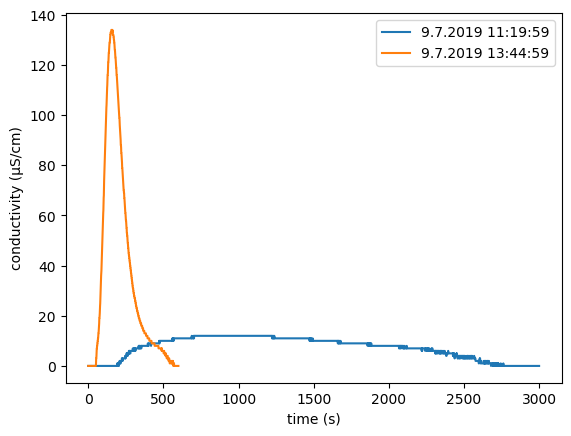

PyObject <matplotlib.legend.Legend object at 0x0000000049CEEB70>

In [7]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

**7 , 8 , 9 , 10 , 11 , 12 , 13 , 14**

In [8]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/205144-10mH2O_09_07_2019-16_30_00.csv", :CTD, :cond, plottime=false);
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-11/205144-10mH2O_09_07_2019-16_30_00.csv");
indices=[12400:12600, 12875:13577, 14133:14221, 15000:15060, 16124:16302, 16653:16920, 28882:28946, 29512:29754];
newtraces = split_conductivity_data_indices(d,indices);
for (n,id,mass) in zip(newtraces, [7,8,9,10,11,12,13,14], [1,2,1,1,1,2,1,2])
    n[:sensor] = 205144
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);

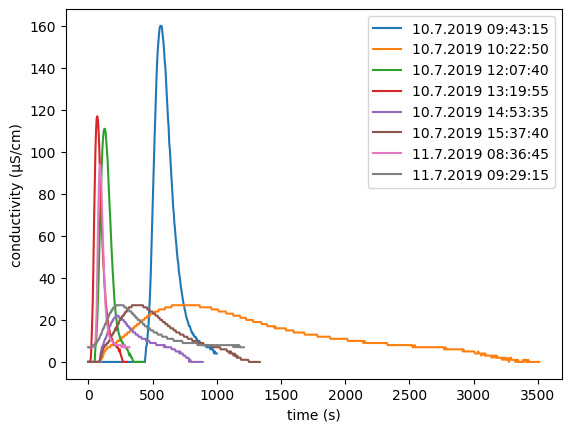

PyObject <matplotlib.legend.Legend object at 0x0000000049D7C160>

In [9]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

**15 , 16 , 17**

In [10]:
#pygui(true)
#plotit(path_CTD*"2019-07-11/205144-10mH2O_11_07_2019-11_45_00.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-11/205144-10mH2O_11_07_2019-11_45_00.csv");
indices=[303:348,577:691,830:974];
newtraces = split_conductivity_data_indices(d,indices);
for (n,id,mass) in zip(newtraces, [15,16,17], [1,1,2])
    n[:sensor] = 205144
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);

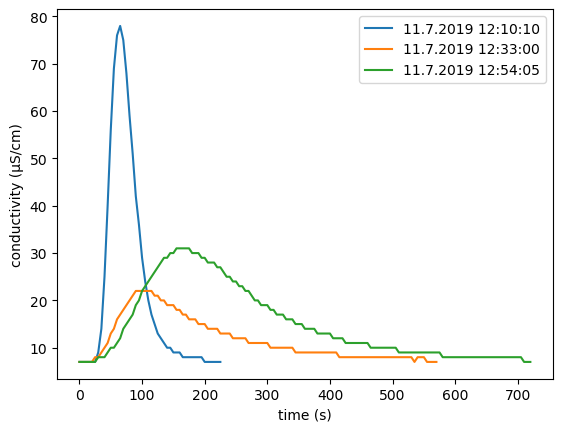

PyObject <matplotlib.legend.Legend object at 0x0000000049E1A048>

In [11]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

**18 , 19 , 20 , 21 , 22**

In [12]:
#pygui(true)
#plotit(path_CTD*"2019-07-16/205144-10mH2O_15_07_2019-14_29_39.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-16/205144-10mH2O_15_07_2019-14_29_39.csv");
indices=[388:426,1474:1591,16149:16194,17068:17157,18199:18229];
newtraces = split_conductivity_data_indices(d,indices);
for (n,id,mass) in zip(newtraces, [18,19,20,21,22], [1,3,1,2,1])
    n[:sensor] = 205144
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);

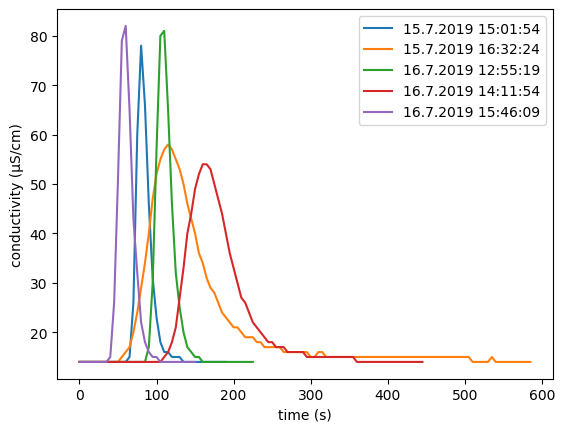

PyObject <matplotlib.legend.Legend object at 0x000000005618D2B0>

In [13]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

**25 and 26 are too noisy and not taken in discharge measurements**

In [14]:
##plotit(path_CTD*"2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv");
indices=[12230:12430];
newtraces = split_conductivity_data_indices(d,indices);



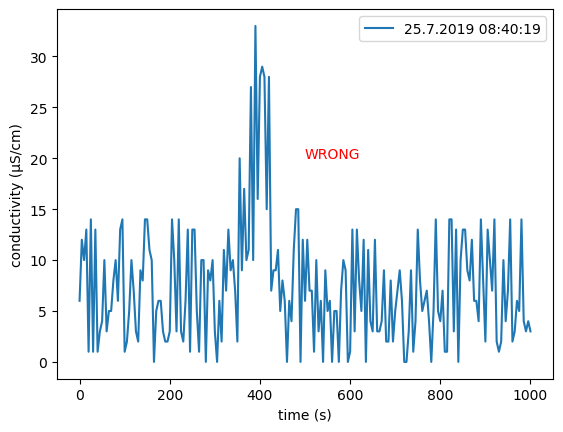

PyObject Text(500, 20, 'WRONG')

In [15]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()
text(500,20,"WRONG", color="r")

**27 , 28 , 29 , 30, 31, 32**

In [16]:
#plotit(path_CTD*"2019-07-31/205144-10mH2O_30_07_2019-12_30_00.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-31/205144-10mH2O_30_07_2019-12_30_00.csv");
indices=[652:740,1645:1761,4062:4105,4380:4456,14991:15050,15248:15345];
newtraces = split_conductivity_data_indices(d,indices);
for (n,id,mass) in zip(newtraces, [27,28,29,30,31,32], [1,2,1,2,1,2])
    n[:sensor] = 205144
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);


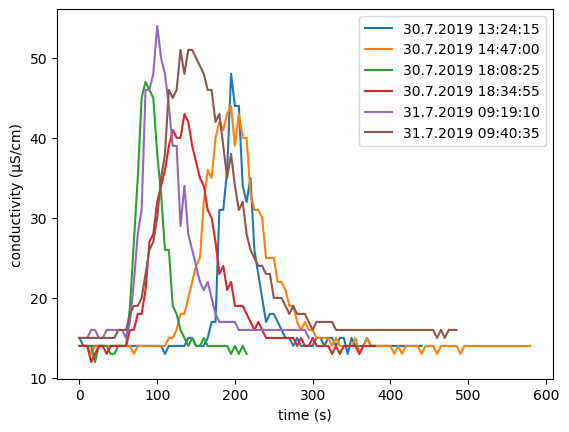

PyObject <matplotlib.legend.Legend object at 0x0000000057191B70>

In [17]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

**33**

In [18]:
#plotit(path_CTD*"2019-08-23/205144-10mH2O_23_08_2019-11_00_00.csv", :CTD, :cond, plottime=true)
d=read_Keller_DCX22_CTD(path_CTD*"2019-08-23/205144-10mH2O_23_08_2019-11_00_00.csv");
indices=[1373:1441];
newtraces = split_conductivity_data_indices(d,indices);
sensors_num=205144;
for (n,id,mass) in zip(newtraces, [33], [1])
    n[:sensor] = 205144
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);

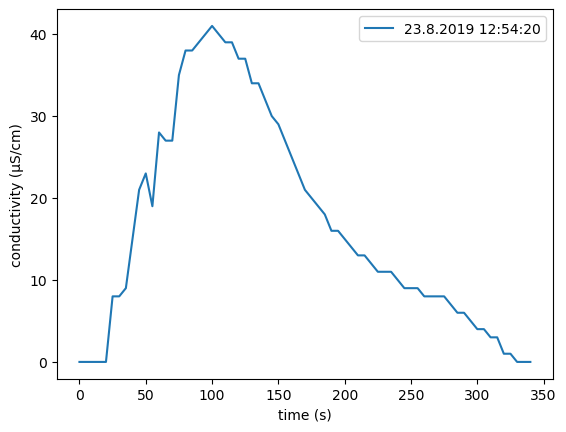

PyObject <matplotlib.legend.Legend object at 0x00000000529A6DD8>

In [19]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

**35**

In [20]:
##plotit(path_CTD*"2019-09-04/205144-10mH2O_04_09_2019-09_20_00.csv", :CTD, :cond, plottime=false)
d=read_Keller_DCX22_CTD(path_CTD*"2019-09-04/205144-10mH2O_04_09_2019-09_20_00.csv");
indices=[142:2381];
newtraces = split_conductivity_data_indices(d,indices);
sensors_num= 205144;
for (n,id,mass) in zip(newtraces, [35], [1])
    n[:sensor] = 205144
    n[:id] = id
    n[:loc] = "P1"
    n[:mass] = mass
end
append!(traces, newtraces);

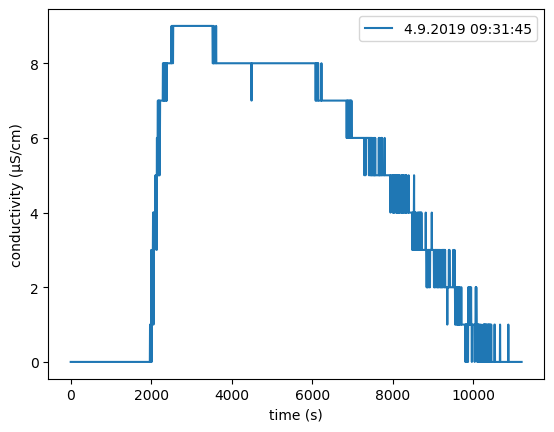

PyObject <matplotlib.legend.Legend object at 0x0000000052979240>

In [21]:
pygui(false)
figure()
for tr in newtraces
    plot(tr[:t], tr[:cond], 
          label=Dates.format(tr[:tstart], "d.m.yyyy HH:MM:SS") )
end
xlabel("time (s)")
ylabel("conductivity (μS/cm)")
legend()

## Determine discharge by integrating the concentration through time

Now that we have the data loaded, we can determine the discharge.  The concentration $C$ times the (unknown) stream discharge $Q$ gives the salt mass flux.  Integrate this over the the whole breakthrough curve to get the injected mass $M$:

$ M = Q \int C \, d t$

This assumes that $Q$ is constant during the salt passage (a good assumption).  Solve for the unknow $Q$:

$ Q = \frac{M}{\int C \, d t}$.

This is what we calculate here, using `calcQ` and `integrate_concentration` (See in helper_function.ipynn)

To get concentration from CTD readouts we use the calibration made in lab, using the 0-2000microS range (the sensors was reccording in these range on the field)


In [22]:
@nbinclude("helper-functions.ipynb");

# Integration boundaries.  If the sensor was submerged before logging started, then
# you can probably delete t1s and t2s (also in below loop).  If not, like in the fake-examples below,
# the boundaries need to be set to avoid integrating the negative concentrations from 0-15s.
#t1s = [15, 15]
#t2s = [Inf, Inf]

# Store the times and discharges
ts1 = DateTime[]
Qs1 = []  # this will contain the discharges
expe1=[]
for i = 1:length(traces)
    Q = calcQ(traces[i],0,Inf,delta_cond2conc_lab_2000[traces[i][:sensor]]) #, t1s[i], t2s[i]) # in m^3/s
    #Achtung, Q is a particle 
    expe=traces[i][:id]
    #if Q < 1000
      println("Discharge for experiment $expe is $(round(Q*1000,sigdigits=2)) ± $(round(std(Q)*1000,sigdigits=2)) l/s")
    #else
       #println("Discharge for experiment $expe is $(round(Q,sigdigits=2)) ± $(round(std(Q),sigdigits=2)) m^3/s")
    #end
    push!(Qs1, Q)
    push!(ts1, traces[i][:tstart])
    push!(expe1, expe)
end;

Discharge for experiment 2 is 82.0 ± 3.4 l/s
Discharge for experiment 5 is 58.0 ± 0.94 l/s
Discharge for experiment 6 is 55.0 ± 1.0 l/s
Discharge for experiment 7 is 43.0 ± 0.85 l/s
Discharge for experiment 8 is 57.0 ± 0.93 l/s
Discharge for experiment 9 is 100.0 ± 1.9 l/s
Discharge for experiment 10 is 130.0 ± 2.3 l/s
Discharge for experiment 11 is 160.0 ± 2.6 l/s
Discharge for experiment 12 is 160.0 ± 2.6 l/s
Discharge for experiment 13 is 270.0 ± 4.6 l/s
Discharge for experiment 14 is 320.0 ± 5.3 l/s
Discharge for experiment 15 is 350.0 ± 5.8 l/s
Discharge for experiment 16 is 450.0 ± 7.4 l/s
Discharge for experiment 17 is 430.0 ± 7.0 l/s
Discharge for experiment 18 is 1000.0 ± 17.0 l/s
Discharge for experiment 19 is 960.0 ± 16.0 l/s
Discharge for experiment 20 is 760.0 ± 13.0 l/s
Discharge for experiment 21 is 860.0 ± 14.0 l/s
Discharge for experiment 22 is 820.0 ± 14.0 l/s
Discharge for experiment 27 is 970.0 ± 16.0 l/s
Discharge for experiment 28 is 980.0 ± 16.0 l/s
Discharge for

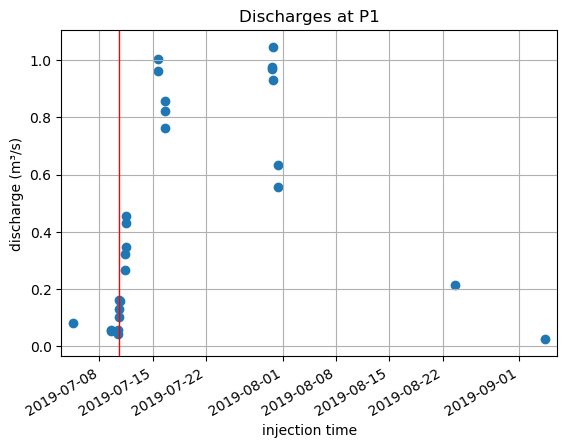

In [23]:
fig=figure()
pygui(false)
# plot the discharge vs time:
scatter(ts1, mean.(Qs1))
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
#scatter(string.(ts), Qs) # might be better?
xlabel("injection time")
ylabel("discharge (m³/s)")
xlim(Date(2019,7,3),Date(2019,9,6))
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
title("Discharges at P1")
grid(true)

## Discharges using different calibrations

Here we use the 0-200 and 0-2000 microS range calibration to assess the sensitivity on discharge calculations

In [24]:
ts1_200 = DateTime[]
Qs1_200 = []  # this will contain the discharges
expe1=[]
for i = 1:length(traces)
    Q = calcQ(traces[i],0,Inf,delta_cond2conc_lab_200[traces[i][:sensor]]) # t1s[i], t2s[i]) # in m^3/s
    expe=traces[i][:id]
    push!(Qs1_200, Q)
    push!(ts1_200, traces[i][:tstart])
    push!(expe1, expe)
end;

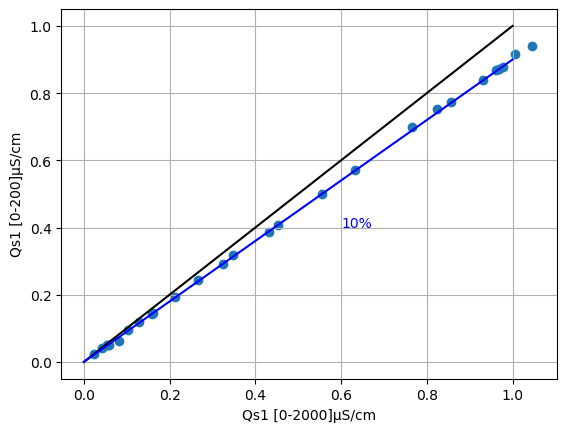

In [25]:
scatter(mean.(Qs1),mean.(Qs1_200))
xlabel("Qs1 [0-2000]μS/cm")
ylabel("Qs1 [0-200]μS/cm")
plot([0,1],[0,1],linestyle="-",color="black")
plot([0,1],[0,0.9],linestyle="-",color="blue")
text(0.6,0.4,"10%",color="blue")
grid(true)

# To store discharges at P1 in a CSV file 

In [26]:
using DataFrames
using CSV

In [27]:
q = round.(Qs1, digits = 3)
sigma_Qs1 = round.(std.(Qs1), digits = 3)
df=DataFrame(Date_Time = ts1, Discharge = q, Std_dev = sigma_Qs1)
CSV.write(path_products*"discharge_P1.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");